In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fft, signal, stats
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict as dd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn-whitegrid')

In [15]:
data = pd.read_parquet("Processed_data.parquet")
class_names = np.array(["Healthy", "Broken"])

In [16]:
def split(data):
    
    X = data.drop(["Fault"], axis=1)
    y = data[["Fault"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False, title=None, cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [18]:
X_train, X_test, y_train, y_test = split(data)

c:\Users\azadk\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Naive Bayes Classifier Score is: -   0.9860896445131375
Confusion matrix, without normalization
[[992   4]
 [ 23 922]]


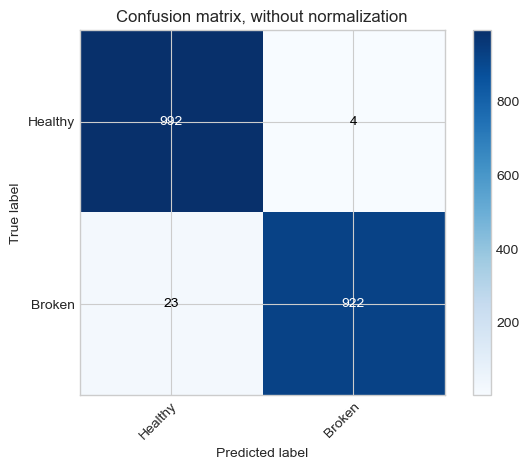

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("The Naive Bayes Classifier Score is: -   "  + str(gnb.score(X_test, y_test)))
y_predict = gnb.predict(X_test)

plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()


## Save the model

import pickle
filename = 'models/GaussianNB_model.sav'
pickle.dump(gnb, open(filename, 'wb'))



c:\Users\azadk\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Logistic Regression Classifier Score is: -   1.0
Confusion matrix, without normalization
[[996   0]
 [  0 945]]


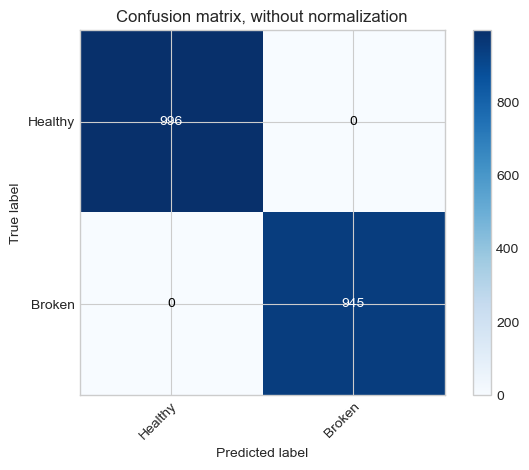

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("The Logistic Regression Classifier Score is: -   "  + str(clf.score(X_test, y_test)))


plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

## Save the model

import pickle
filename = 'models/LogisticRegression_model.sav'
pickle.dump(clf, open(filename, 'wb'))
